In [9]:
import xarray as xr
from postprocess.error_distribution import histograms_to_biais_rmse
import numpy as np

working_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_7'
ndsis = np.arange(25,56,5)



In [ ]:
biais_viirs, rmse_viirs, biais_modis, rmse_modis = [],[],[],[]
for ndsi in ndsis:
    ds = xr.open_dataset(f'{working_folder}/ndsi_{ndsi}/analyses/uncertainty/uncertainty_WY_2023_2024_nasa_l3_snpp_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    result = histograms_to_biais_rmse(metrics_dataset=ds)
    biais_viirs.append(result.biais.values)
    rmse_viirs.append(result.rmse.values)
    ds = xr.open_dataset(f'{working_folder}/ndsi_{ndsi}/analyses/uncertainty/uncertainty_WY_2023_2024_nasa_l3_terra_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    result = histograms_to_biais_rmse(metrics_dataset=ds)
    biais_modis.append(result.biais.values)
    rmse_modis.append(result.rmse.values)

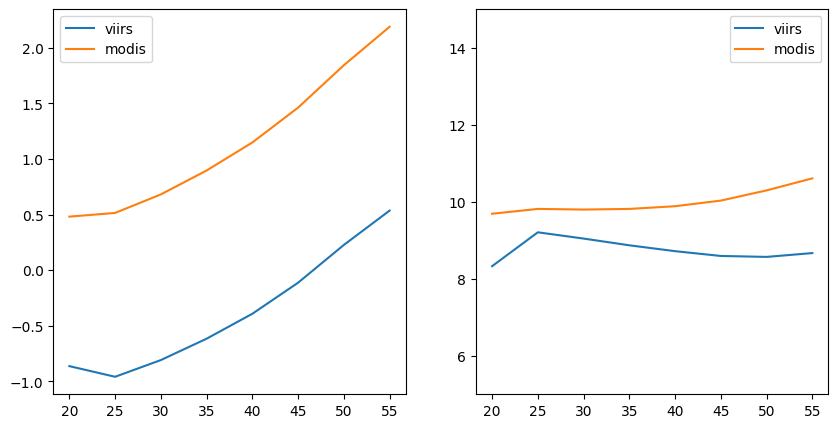

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].plot(ndsis, biais_viirs, label='viirs')
ax[0].plot(ndsis, biais_modis, label='modis')
ax[0].legend()
ax[1].plot(ndsis, rmse_viirs, label='viirs')
ax[1].plot(ndsis, rmse_modis, label='modis')
ax[1].set_ylim(5,15)
ax[1].legend()

In [11]:
from postprocess.skill_scores import compute_score


acc_viirs, f1_viirs, acc_modis, f1_modis = [],[],[],[]
for ndsi in ndsis:
    ds = xr.open_dataset(f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_7/ndsi_{ndsi}/analyses/confusion_table/confusion_table_WY_2023_2024_nasa_l3_snpp_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    acc_viirs.append(compute_score(ds, 'accuracy'))
    f1_viirs.append(compute_score(ds, 'f1_score'))
    ds = xr.open_dataset(f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_7/ndsi_{ndsi}/analyses/confusion_table/confusion_table_WY_2023_2024_nasa_l3_terra_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    acc_modis.append(compute_score(ds, 'accuracy'))
    f1_modis.append(compute_score(ds, 'f1_score'))

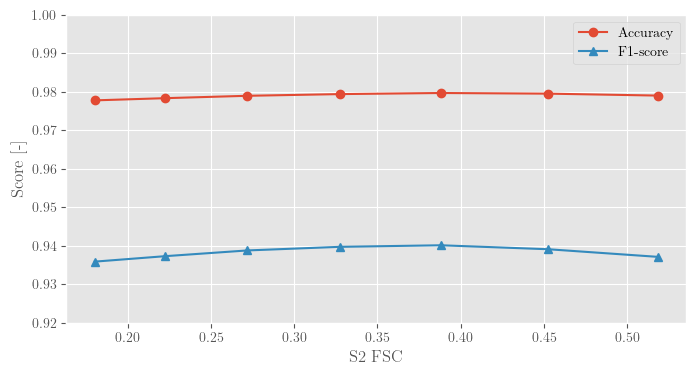

In [43]:
import matplotlib.pyplot as plt
import matplotlib

from fractional_snow_cover import gascoin

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(gascoin(ndsis/100,0), acc_viirs, '-o', label='Accuracy')
ax.plot(gascoin(ndsis/100,0), f1_viirs, '-^', label='F1-score')
# ax.plot(ndsis, acc_modis,'--', label='acc modis')
# ax.plot(ndsis, f1_modis, label='f1 modis')
ax.legend()
ax.set_ylabel('Score [-]')
ax.set_xlabel('S2 FSC')
ax.set_ylim(0.92,1)

fig.patch.set_alpha(0.0)
fig.savefig('/home/imperatoren/work/VIIRS_S2_comparison/article/illustrations/calibration_fsc.png', format='png',bbox_inches='tight')

In [47]:
1.45*0.345

0.50025

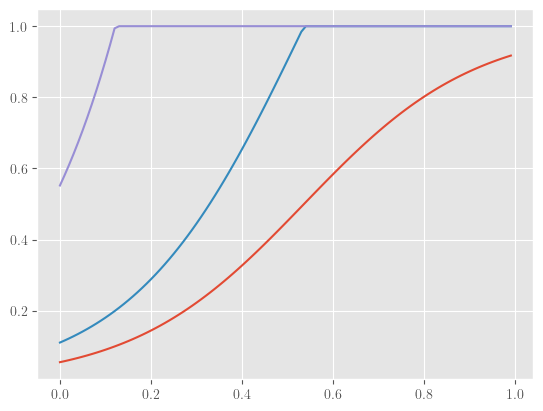

In [35]:
import numpy as np

def gascoin(ndsi, f_veg):
    f_snow_toc = 0.5 * np.tanh(2.65 * ndsi - 1.42) + 0.5
    return np.minimum(1, f_snow_toc / (1 - f_veg))

plt.plot(np.arange(0,1,0.01), gascoin(np.arange(0,1,0.01), 0))
plt.plot(np.arange(0,1,0.01), gascoin(np.arange(0,1,0.01), 0.5))
plt.plot(np.arange(0,1,0.01), gascoin(np.arange(0,1,0.01), 0.9))

In [27]:
1.45*0.55

0.7975